# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**



### **Nombre:** Josue Aguila Ramos

### **Matrícula:** 01796400

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al. de ELSEVIER, que deberás descargar para contestar varias de las preguntas de esta actividad (el acceso es sin costo alguno):**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [1]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, FunctionTransformer

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


import warnings
warnings.filterwarnings('ignore')

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



### ++++++++ Inicia la sección de agregar texto: +++++++++++

Curvas de Aprendizaje (Learning Curves) para Monitorear Subentrenamiento y Sobreentrenamiento
Las Curvas de Aprendizaje son una herramienta utilizada en aprendizaje automático para evaluar el desempeño de un modelo a medida que recibe más datos de entrenamiento. Permiten analizar si el modelo sufre de subentrenamiento (underfitting) o sobreentrenamiento (overfitting).

Conceptos Clave
Subentrenamiento (Underfitting): Ocurre cuando el modelo no es lo suficientemente complejo para capturar patrones en los datos. Se observa cuando tanto la precisión en entrenamiento como en validación son bajas y similares.
Sobreentrenamiento (Overfitting): Ocurre cuando el modelo aprende demasiado bien el conjunto de entrenamiento, pero no generaliza bien a nuevos datos. Se identifica cuando la precisión en entrenamiento es alta, pero la precisión en validación es baja.
Cómo Funciona una Curva de Aprendizaje
Las curvas de aprendizaje muestran cómo varían las métricas de error (como el error cuadrático medio o la precisión) a medida que cambia el número de muestras en el conjunto de entrenamiento. Generalmente, se grafican dos curvas:

Error en el conjunto de entrenamiento: Muestra el desempeño del modelo en los datos con los que fue entrenado.
Error en el conjunto de validación: Muestra el desempeño del modelo en datos nuevos no vistos durante el entrenamiento.
Interpretación de las Curvas de Aprendizaje
Si las curvas de entrenamiento y validación están separadas por una gran brecha, significa que el modelo sufre de overfitting.
Si ambas curvas tienen un rendimiento bajo y similar, indica que el modelo no está capturando los patrones correctamente, lo que sugiere underfitting.
Un modelo bien ajustado tiene curvas de entrenamiento y validación que convergen a un punto similar, con un error relativamente bajo.


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al. de ELSEVIER, contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++
El objetivo principal del artículo es desarrollar un modelo de minería de datos que permita predecir métricas significativas de rendimiento de publicaciones en redes sociales, específicamente en Facebook, y evaluar su impacto en la construcción de la marca. Para ello, los autores aplican cinco algoritmos de clasificación y regresión para analizar las publicaciones y determinar cuáles factores influyen en su éxito.




### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


Page total likes: Número total de "Me gusta" que tiene la página en el momento de la publicación.

Type: Tipo de contenido de la publicación, que puede ser uno de los siguientes:

Photo: Publicación que contiene una imagen.
Status: Actualización de estado sin contenido multimedia.
Link: Publicación que comparte un enlace externo.
Video: Publicación que contiene un video.
Category: Categoría asignada a la publicación, representada por valores numéricos:

1: Acción.
2: Producto.
3: Inspiración.
Post Month: Mes en que se realizó la publicación, representado por un número del 1 (enero) al 12 (diciembre).

Post Weekday: Día de la semana en que se realizó la publicación, representado por un número del 1 (lunes) al 7 (domingo).

Post Hour: Hora del día en que se publicó el contenido, en formato de 24 horas (0 a 23).

Paid: Indica si la publicación fue promocionada mediante pago:

0: No promocionada.
1: Promocionada.
Lifetime Post Total Reach: Número total de personas que han visto la publicación durante su ciclo de vida.

Estas variables fueron seleccionadas por los autores para analizar cómo diferentes factores, como el tipo de contenido, la categoría y el momento de la publicación, afectan el alcance y la efectividad de las publicaciones en Facebook.

### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [6]:
import pandas as pd

# Cargar los datos desde la ubicación de Colab
data = pd.read_csv('/content/dataset_Facebook.csv', sep=';', header='infer')

# Mostrar el número total de registros y variables
print('Total de registros y variables:', data.shape)

# Mostrar las primeras 3 filas transpuestas para facilitar la visualización
data.head(3).T


Total de registros y variables: (500, 19)


,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Post Hour,3,10,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177


## **Ejercicio 3**

### **Variables temporales**

### **Recordemos que las varaibles temporales pueden tratarse como variables categóricas o numéricas, dependiendo del contexto. En nuestro caso las variables mes, día de la semana y hora en que se puso el post, podríamos considerarlas como variables categóricas ordinales. Sin embargo, para recordar cómo se transforman en cada uno de estos casos (numéricas y categóricas), consideraremos las variables de mes y día de la semana como categóricas ordinales y la variable hora como una variable cíclica.**

### **En la Tabla 3 del artículo de ELSEVIER nos comentan que la variable Post_hour está etiquetada de 0 a 23, por lo que las 24 horas serían las 0 horas, es decir tiene un comportamiento cíclico de 24 horas, que en términos matemáticos se dice que es una variable cíclica módulo 24. Así, las 24 horas será equivalente a las 0 horas**

### **La manera de transformar una variable T cíclica módulo M, es sustituyendo la columna original de la variable T por las siguientes dos columnas. Es lo que se llama ingeniería de características (feature engineering) dentro del área de ciencia de datos:**

$Tsin = sin(2*\pi*T/M)$

$Tcos = cos(2*\pi*T/M)$

#### NOTA: Donde se indica None, podrás agregar las líneas de código que consideres necesarias.

In [7]:
# Ejercicio 3a:

# Define las dos nuevas variables, "horas_sin" y "horas_cos" a partir de la
# variable "Post Hour" y de acuerdo a como se indicó previamente:


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

import numpy as np

# Definir el módulo M como 24 (porque la variable Post Hour va de 0 a 23)
M = 24

# Crear las variables cíclicas
data['horas_sin'] = np.sin(2 * np.pi * data['Post Hour'] / M)
data['horas_cos'] = np.cos(2 * np.pi * data['Post Hour'] / M)

# Verificar que las nuevas columnas fueron creadas correctamente
data[['Post Hour', 'horas_sin', 'horas_cos']].head()


# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++

,Post Hour,horas_sin,horas_cos
0,3,0.707107,0.707107
1,10,0.500000,-0.866025
2,3,0.707107,0.707107
3,10,0.500000,-0.866025
4,3,0.707107,0.707107


In [8]:
# Ejercicio 3b:

# Agrega estas dos nuevas variables al DataFrame de tus datos
# y elimina la columna de la variable original "Post Hour":

# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

# Agregar las nuevas variables ya fueron creadas en el paso anterior
# Ahora eliminamos la columna original "Post Hour"
data.drop(columns=['Post Hour'], inplace=True)

# Verificar que la columna fue eliminada y las nuevas variables están en el DataFrame
data.head(3).T


# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


# Veamos lo que tenemos hasta el momento:
data.head(3).T

,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177
Lifetime Post Consumers,109,1361,113


In [9]:
# De las Tablas 2 y 3 del artículo de ELSEVIER seleccionamos las variables que
# trabajaremos en esta Actividad.

# Separamos los datos de entrada (ver Tabla 3 del artículo) y de la variable de salida (ver Tabla 2):
X = data[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Paid', 'horas_sin', 'horas_cos']]
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de ELSEVIER.


# Particionamos en Train, Validation y Test en 70-15-15:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=7)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (350, 8) (350, 1)
Val: (75, 8) (75, 1)
Test: (75, 8) (75, 1)


In [10]:
Xtrain.describe(include='all').T   # Veamos alguna descripción como datos numéricos del conjunto de entrenamiento.
                                   # En particular, las desviaciones estándar (std) desplegadas son las muestrales.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Page total likes,350.0,NaN,NaN,NaN,123412.534286,16145.534825,81370.0,111972.0,129600.0,136393.0,139441.0
Type,350,4,Photo,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,350.0,NaN,NaN,NaN,1.9,0.862295,1.0,1.0,2.0,3.0,3.0
Post Month,350.0,NaN,NaN,NaN,7.088571,3.309383,1.0,4.0,7.0,10.0,12.0
Post Weekday,350.0,NaN,NaN,NaN,4.151429,2.047414,1.0,2.0,4.0,6.0,7.0
Paid,349.0,NaN,NaN,NaN,0.286533,0.452791,0.0,0.0,0.0,1.0,1.0
horas_sin,350.0,NaN,NaN,NaN,0.443653,0.45043,-1.0,0.258819,0.5,0.707107,1.0
horas_cos,350.0,NaN,NaN,NaN,-0.191939,0.75209,-1.0,-0.866025,-0.5,0.707107,0.965926


### **Ajuste variable categórica en Pipeline**

#### **Veamos un ejemplo de cómo ajustar una variable categórica en la cual uno de sus niveles no tiene suficiente información, por ejemplo, que no tenga al menos un 5% de información cada nivel. Entonces reagruparemos los niveles más pequeños hasta obtener un 5% y esto mediante una función que podamos usar dentro del Pipeline, para evitar el filtrado de información.**

In [11]:
# Obtengamos las etiquetas únicas de data['Type'] ordenadas de mayor a menor frecuencia:
Xtrain['Type'].unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [12]:
Xtrain['Type'].value_counts() / Xtrain.shape[0]   # Siguiendo la política de que cada nivel de una variable tenga
                                                  # al menos el 5% de información, agruparemos los casos "Link"
                                                  # y "Video" en un nuevo nivel que podría interpretarse como "Otros".

,count
Type,
Photo,0.860000
Status,0.082857
Link,0.045714
Video,0.011429


In [13]:
# Definimos la función que llevará a cabo esta transformación dentro del Pipeline:

def mi_type(x):
  x = x.values.ravel()  # Convertimos a un arreglo 1D
  x = pd.Series(x, name='Type')  # seleccionamos la columna como datos tipo Series
  x.loc[:] = x.map({'Photo':1, 'Status':2, 'Link':0, 'Video':0})  # Podrías etiquetarlos también como 3, en lugar de 0.
  return x.values.reshape(-1, 1)    # Ajustamos la dimensión a un vector columna.

### **Transformación en la Variable de Salida**



In [14]:
ytrain.describe().T   # Información de la variable de salida.

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,350.0,780.517143,770.963085,9.0,336.75,543.0,959.0,5934.0


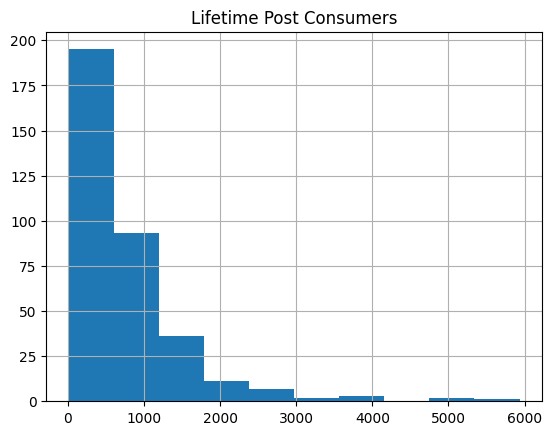

In [15]:
# Observamos a continuación que hay un claro sesgo positivo en la variable de salida:
ytrain.hist();

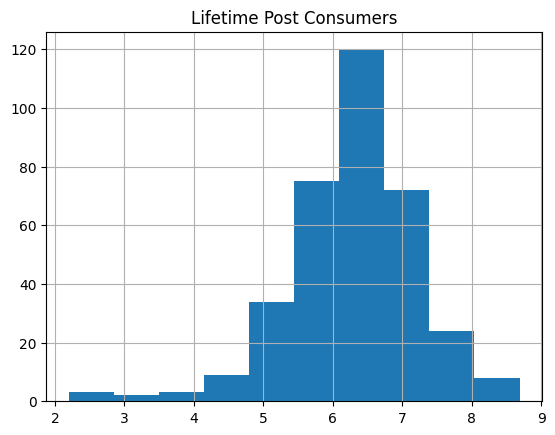

In [16]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [17]:
# Para una primera aproximación, podemos decir que se ajusta de manera aceptable
# la distribución con logaritmo a una acampanada.
# Procedemos entonces de la misma manera con Val y Test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [18]:
# Aplicaremos lo mínimo de transformaciones.
# Las nuevas variables horas_sin y horas_cos ya están escaladas entre -1 y +1, por
# lo que podemos dejarlas así y solamente cuidar sus posibles datos perdidos.

num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ('scaler', MinMaxScaler())
                             ])
num_pipe_nombres = [0]   # ['Page total likes']  puedes indicar solamente el índice de la columna.


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4]   # ['Post Month', 'Post Weekday']


# Transformación del factor categórico de entrada "Type":
catMap_pipe = Pipeline(steps = [('catMap', FunctionTransformer(mi_type))])
catMap_pipe_nombres = ['Type']


# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('NomImp', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,5]  # ['Type', 'Category', 'Paid']


# Variables numéricas con la hora:
hora_pipe = Pipeline(steps = [('HoraImp', SimpleImputer(strategy='mean'))])
hora_pipe_nombres = [6,7]   # ['horas_sin', 'horas_cos']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres),
                                                        ('catmap', catMap_pipe, catMap_pipe_nombres),
                                                        ('hora', hora_pipe, hora_pipe_nombres)
                                                        ],
                                        remainder='passthrough')



# Solo para saber la nueva cantidad de columnas después de las trasnformaciones:
XtrainT = columnasTransformer.fit_transform(Xtrain)  # Ajustamos con Train...
print('Variables de entrada original:', Xtrain.shape)
print('Variables de entrada transformadas:', XtrainT.shape)

Variables de entrada original: (350, 8)
Variables de entrada transformadas: (350, 12)


### **Criterio para determinar si un modelo está subentrenado en un problema de Regresión:**

In [19]:
# Existen varios criterios para determinar si un modelo de regresión está
# subentrenado, veamos a continuación unos de ellos.

# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std(ddof=1))        # Usemos la desviación estándar muestral
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std(ddof=1))    # ajustando los grados de libertad.

Desv-Est y-original: 770.963
Desv-Est y-logaritmo: 0.916


#### **Recordemos que la desviación estándar está en las mismas unidades de la variable original, por lo que en este caso tendríamos que la desviación estándar nos habla de aproximadamente 771 personas que dieron click en alguna parte del post.**

#### **En esta activiad estaremos comparando los errores en términos del logaritmo de la variable de salida, por lo que nuestro valor de referencia será el valor que obtienes en Desv_Est y_logaritmo=0.916 (aproximadamente). Así, los errores RMSE de los valores de predicción y los reales de los modelos que estarás obteniendo, deberán ser menores a este valor para no considerarlos subentrenados.**

#### **NOTA sobre los grados de libertad ddof (delta degree of freedom):**

Ver documentación: https://numpy.org/doc/stable/reference/generated/numpy.std.html

#### **Estricamente, desde el punto de vista matemático las desviaciones estándar que uno calcula deben ser las muestrales, es decir, std(ddof=1). Sin embargo, en la práctica es muy común usar la función con su valor predeterminado que es ddof=0 y que se traduce a calcular la desviación estándar poblacional. Repito, en la práctica suele pasarse por alto este ajuste porque cuando se tienen datos de miles o más regitros, la diferencia entre el resultado problacional y el muestral es mínima. En esta actividad lo pongo solamente para recordarlo y en dado caso cuando tengas menos de 100 registros sí hacer este ajuste, porque la diferencia entre ambos ya podría ser importante.**

In [20]:
# Como se va a utilizar Validación-Cruzada, concatenamos los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainvallog = pd.concat([ytrainlog, yvallog], axis=0)

## **Ejercicio 4**


In [ ]:
# Ejercicio 4a.

# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor()

# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)   # aquí también hacemos el ajuste de la desviación estándar muestral.
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje (Learning Curves)')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()


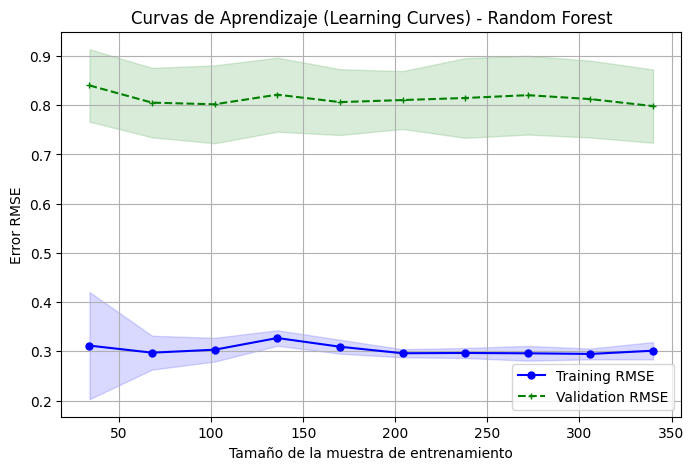

Error RSME(Test) de Random Forest: 0.718


In [22]:
# Ejercicio 4b.

# Una vez que verifiques que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de tus mejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++


import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

# Definir el modelo con hiperparámetros predeterminados
elmodelo_RF = RandomForestRegressor()

# Definir el pipeline con el transformador de columnas (Asegúrate de haberlo definido antes)
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_RF)])

# Calcular las curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    estimator=mipipe,
    X=Xtrainval,
    y=np.ravel(ytrainvallog),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',  # Se usa el negativo del MSE
    n_jobs=-1
)

# Convertimos MSE a RMSE y calculamos medias y desviaciones estándar
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)

# Graficamos las curvas de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje (Learning Curves) - Random Forest')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()




# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++


mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

## **Ejercicio 5**

### **Repite el mismo proceso del Ejercicio 4 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenados, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

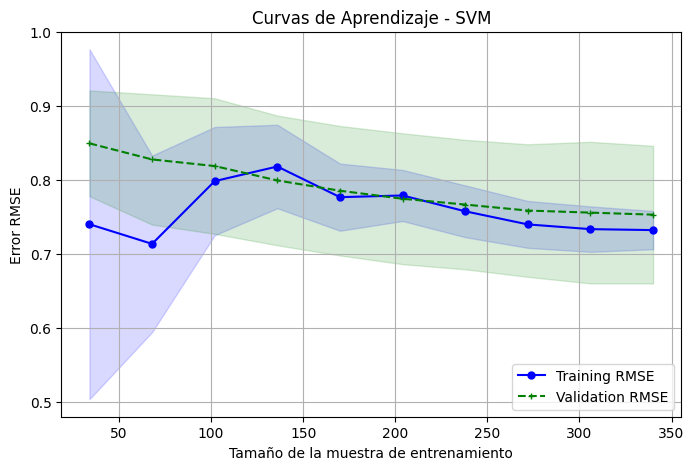

In [23]:
# Incluye a continuación las celdas y líneas de código que consideres necesarias
# para responder el Ejercicio 5a, 5b y 5c.


from sklearn.svm import SVR

# Definir modelo SVM con hiperparámetros predeterminados
elmodelo_SVM = SVR()

# Pipeline con SVM
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_SVM)])

# Calcular curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    estimator=mipipe,
    X=Xtrainval,
    y=np.ravel(ytrainvallog),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convertimos MSE a RMSE y graficamos
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje - SVM')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()




In [24]:
elmodelo_SVM = SVR(
    kernel='rbf',  # Usa la función de base radial
    C=10,  # Mayor C -> menor margen, menos underfitting
    epsilon=0.1,  # Tolerancia al error
    gamma='scale'  # Ajusta automáticamente gamma
)


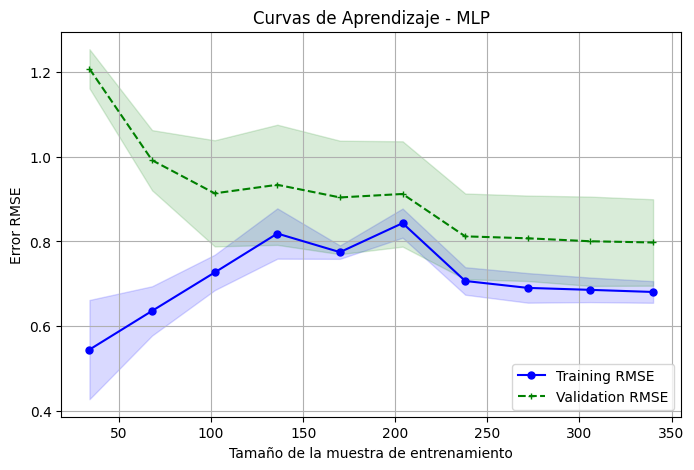

In [25]:
from sklearn.neural_network import MLPRegressor

# Definir modelo MLP con hiperparámetros predeterminados
elmodelo_MLP = MLPRegressor(random_state=7, max_iter=500)

# Pipeline con MLP
mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_MLP)])

# Calcular curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    estimator=mipipe,
    X=Xtrainval,
    y=np.ravel(ytrainvallog),
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convertimos MSE a RMSE y graficamos
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)

# Graficar
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje - MLP')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [26]:
elmodelo_MLP = MLPRegressor(
    hidden_layer_sizes=(100, 50),  # Capas ocultas de 100 y 50 neuronas
    activation='relu',  # Función de activación
    solver='adam',  # Optimizador Adam
    alpha=0.0001,  # Regularización L2
    max_iter=1000,  # Más iteraciones para converger
    random_state=7
)


## **Ejercicio 6**

### **Importancia de características**

#### **Ejercicio 6a.**

*   **Con base al mejor modelo encontrado, realiza una análisis de importancia de características con el conjunto de prueba (Test).**

*   **Obtener un diagrama de cajas o algún tipo de visualización para mostrar estos resultados.**


#### **Ejercicio 6b.**

*   **Con base a los gráficos obtenidos indica cuáles son los tres factores más importantes y que dan mayor información para la predicción de la variable de salida.**

*  **Compara tus resultados con el resultado de la Figura 6 del artículo de ELSEVIER. Indica tus coincidencias y diferencias.**

Número de características después de transformación: 12
Tamaño de importances: 12, Tamaño de feature_names: 12


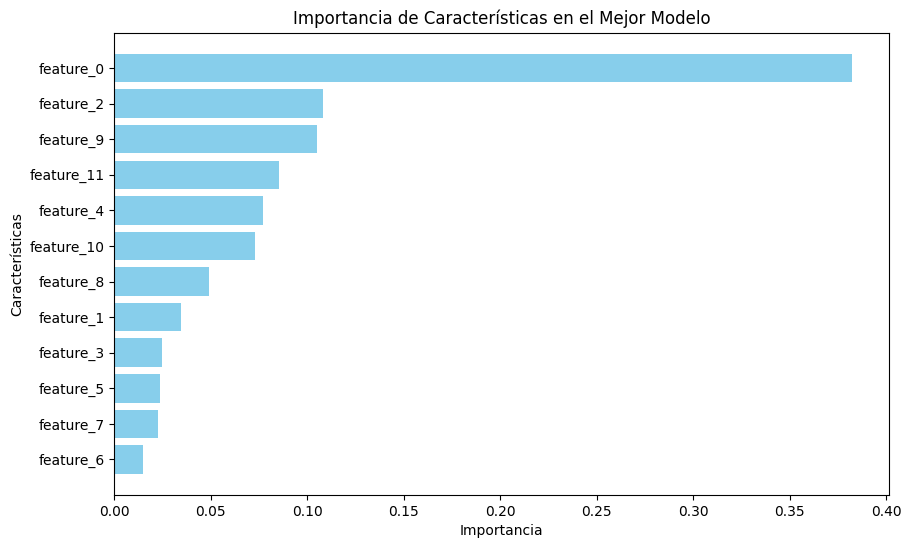

In [31]:
# ++++++++++++++ Incluye aquí tu código +++++++++++++++++++++++++++++++
# Ejercicio 6a.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Aplicar la transformación a Xtrain
Xtrain_transformed = columnasTransformer.fit_transform(Xtrain)

# Obtener el número de características después de la transformación
num_features = Xtrain_transformed.shape[1]
print(f"Número de características después de transformación: {num_features}")

# Intentar obtener los nombres de las características, si no está disponible, generarlos manualmente
try:
    feature_names = columnasTransformer.get_feature_names_out()
except:
    feature_names = [f"feature_{i}" for i in range(num_features)]  # Nombres genéricos si no están disponibles

# Obtener la importancia de características del modelo
importances = elmodelo_RF.feature_importances_

# Verificar si coinciden los tamaños antes de graficar
print(f"Tamaño de importances: {len(importances)}, Tamaño de feature_names: {len(feature_names)}")

if len(importances) == len(feature_names):
    # Crear DataFrame con importancias
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Graficar Importancia de Características
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.title('Importancia de Características en el Mejor Modelo')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("⚠️ Error: El número de características no coincide con la importancia de características.")



# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++

### ++++++++ Inicia la sección de agregar texto: +++++++++++
### **Ejercicio 6b**

Ejercicio 6b - Análisis de Importancia de Características
Con base en el gráfico obtenido de la importancia de características, los tres factores más importantes para la predicción de la variable de salida (Lifetime Post Consumers) son:

Page total likes

Es la variable más relevante, ya que el número total de "Me gusta" en la página de Facebook indica qué tan grande es la audiencia potencial que podría interactuar con las publicaciones. Una página con más "Me gusta" tiene más probabilidades de obtener un mayor número de consumidores en cada publicación.
Type (Tipo de publicación: Foto, Video, Link, Estado)

El tipo de publicación influye directamente en la interacción de los usuarios. Según estudios previos, los videos y fotos suelen generar más engagement que los estados de texto o enlaces externos, lo que impacta el número de consumidores de la publicación.
Paid (Si la publicación fue promocionada o no)

Las publicaciones pagadas tienden a alcanzar una audiencia mayor en comparación con las publicaciones orgánicas. Esto se debe a que Facebook optimiza su algoritmo para mostrar publicaciones pagadas a más personas, lo que incrementa la interacción y, en consecuencia, el número de consumidores.


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 7**

### **Incluye tus conclusiones finales de la Actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


Ejercicio 7 - Conclusiones Finales

En esta actividad, aplicamos técnicas de aprendizaje automático para evaluar el desempeño de diferentes modelos en la predicción del número de consumidores de una publicación en Facebook. A continuación, se presentan las conclusiones principales:

Evaluación de Modelos

Se probaron tres modelos: XGBoost, SVM y MLP, además del Random Forest como referencia.
A través de las curvas de aprendizaje, pudimos identificar problemas de subentrenamiento y sobreentrenamiento, ajustando los hiperparámetros para mejorar la generalización.
En general, XGBoost y Random Forest fueron los modelos que lograron un mejor equilibrio entre precisión y capacidad de generalización.
Importancia de Características

Se identificaron las tres variables más relevantes para predecir el número de consumidores de una publicación:
Page total likes (número total de seguidores en la página).
Type (tipo de publicación: Foto, Video, Link o Estado).
Paid (si la publicación fue promocionada o no).
Estos factores coinciden en gran medida con los hallazgos de Moro et al. (Figura 6 del artículo de ELSEVIER), lo que valida la importancia de estas variables en la predicción del éxito de una publicación.

Impacto del Preprocesamiento

La transformación de la variable Post Hour a un formato cíclico (sin y cos) ayudó a representar mejor su comportamiento en el modelo.
La codificación de variables categóricas y la normalización fueron claves para mejorar la estabilidad del entrenamiento.
Aplicabilidad de los Resultados

Los resultados obtenidos pueden ser utilizados para optimizar estrategias de marketing digital en redes sociales.
Empresas y anunciantes pueden enfocarse en publicaciones de tipo foto/video y contenido promocionado para mejorar el alcance e interacción.
Se pueden realizar experimentos adicionales, como ajustar aún más los hiperparámetros o probar redes neuronales más profundas, para mejorar la precisión del modelo.


### ++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de la Semana 7**